<a href="https://colab.research.google.com/github/jonimccawley/OpenCV-Workshop/blob/main/Simple_Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import OpenCV
import cv2 as cv

# need this library only foor google colab, normally use cv2.imshow(image)
from google.colab.patches import cv2_imshow

#   NumPy for efficient array operations
#   Matplotlib for image Visualization
import numpy as np
import matplotlib.pyplot as plt

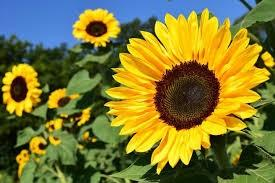

In [4]:
# Load image from file path
image = cv.imread('sunflowers.jpg')

# Display the loaded image in the Colab environment
cv2_imshow(image)

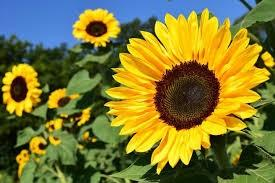

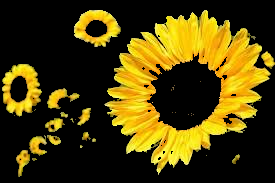

In [5]:
# Convert the image to the HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define the lower and upper bounds for the yellow color in HSV
lower_yellow = np.array([18, 80, 100])
upper_yellow = np.array([30, 255, 255])

# Create a mask to extract the yellow color
yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

# Bitwise-AND the original image and the mask to extract the yellow
yellow_extracted = cv.bitwise_and(image, image, mask=yellow_mask)

# Display the original image and the extracted yellow color
cv2_imshow(image)
cv2_imshow(yellow_extracted)
cv.waitKey(0)
cv.destroyAllWindows()


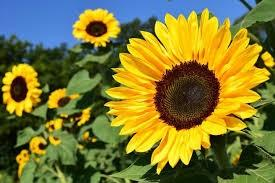

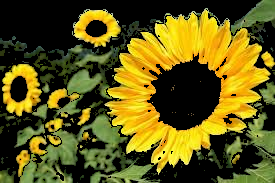

In [6]:
# Define a broader range for the green color in HSV
lower_green = np.array([35, 30, 50])
upper_green = np.array([85, 220, 255])

# Create a mask to extract the green color
green_mask = cv.inRange(hsv_image, lower_green, upper_green)

# Combine the yellow and green masks
combined_mask = cv.add(yellow_mask, green_mask)

# Bitwise-AND the original image and the combined mask to extract yellow and green
yellow_green_extracted = cv.bitwise_and(image, image, mask=combined_mask)

# Display the original image and the extracted yellow and green colors
cv2_imshow(image)
cv2_imshow(yellow_green_extracted)
cv.waitKey(0)
cv.destroyAllWindows()

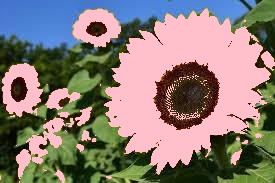

In [7]:
# Convert the image to the HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Define the lower and upper bounds for the yellow color in HSV
lower_yellow = np.array([13, 70, 90])
upper_yellow = np.array([35, 255, 255])

# Create a mask to extract the yellow color from the HSV image
yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

# Replace the yellow pixels with pink
image[np.where(yellow_mask > 0)] = [203, 192, 255]

# Display the modified image with yellow turned to pink
# cv.imshow('Modified Image', image)
cv2_imshow(image)
cv.waitKey(0)
cv.destroyAllWindows()

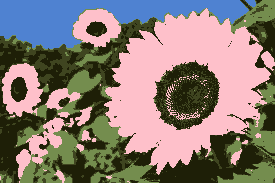

In [10]:
import cv2
import numpy as np

# Reshape the image data into a 2D array (pixel_count x 3)
pixels = image.reshape((-1, 3))

# Convert to floating point for more accurate arithmetic
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to 8-bit values
centers = np.uint8(centers)

# Map the labels to the centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image
segmented_image = segmented_image.reshape(image.shape)

# Display the result
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()